In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/samir sah/Desktop/RStudio/program/python/archive (2)/Reviews.csv")

In [3]:
df.head

<bound method NDFrame.head of             Id   ProductId          UserId                      ProfileName  \
0            1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1            2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2            3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3            4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4            5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
...        ...         ...             ...                              ...   
568449  568450  B001EO7N10  A28KG5XORO54AY                 Lettie D. Carter   
568450  568451  B003S1WTCU  A3I8AFVPEE8KI5                        R. Sawyer   
568451  568452  B004I613EE  A121AA1GQV751Z                    pksd "pk_007"   
568452  568453  B004I613EE   A3IBEVCTXKNOH          Kathy A. Welch "katwel"   
568453  568454  B001LR2CU2  A3LGQPJCZVL9UC                         srfell17   

        HelpfulnessNu

In [4]:
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568401.000000,568401.000000,568401.000000,568401.000000,5.684010e+05
mean,284228.120582,1.743903,2.227911,4.183297,1.296261e+09
std,164098.955187,7.636845,8.288820,1.310376,4.803804e+07
min,1.000000,0.000000,0.000000,1.000000,9.393408e+08
25%,142116.000000,0.000000,0.000000,4.000000,1.271290e+09
50%,284225.000000,0.000000,1.000000,5.000000,1.311120e+09
75%,426342.000000,2.000000,2.000000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.000000,5.000000,1.351210e+09


In [7]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]','',text)
    return text 

df['cleaned_review'] = df['Text'].apply(clean_text)

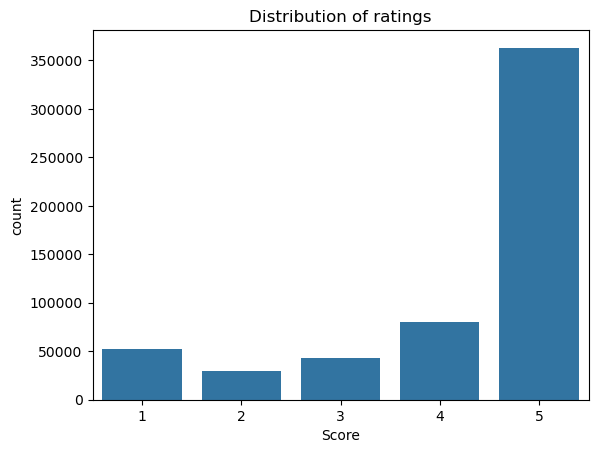

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x = 'Score', data = df)
plt.title('Distribution of ratings')
plt.show()

In [9]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


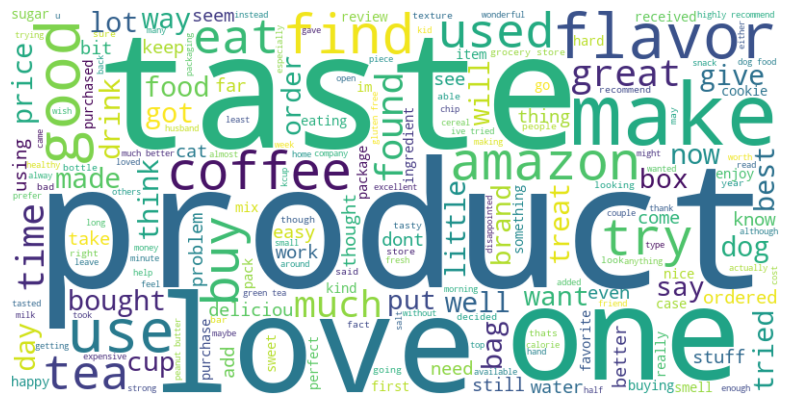

In [10]:
from wordcloud import WordCloud

text = ' '.join(df['cleaned_review'])
wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate(text)

plt.figure(figsize = (10,5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [11]:
!pip install textblob

Defaulting to user installation because normal site-packages is not writeable


In [12]:
from textblob import TextBlob

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['sentiment'] = df['cleaned_review'].apply(get_sentiment)

In [13]:
df['sentiment_category'] = df['sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

In [14]:
df['sentiment_category'].value_counts()

sentiment_category
Positive    500637
Negative     59391
Neutral       8373
Name: count, dtype: int64

In [15]:
sentiment_by_product = df.groupby(['ProductId',  'sentiment_category']).size().unstack(fill_value = 0)

sentiment_by_product.head()

sentiment_category,Negative,Neutral,Positive
ProductId,,,
0006641040,4,0,33
141278509X,0,0,1
2734888454,1,0,1
2841233731,0,0,1
7310172001,19,6,148


In [16]:
most_positive_products = sentiment_by_product.sort_values(by = 'Positive', ascending = False).head()

most_negative_products = sentiment_by_product.sort_values(by = 'Negative', ascending = False).head()

print("Products with most positive reviews:")
print(most_positive_products)

print("\nProucts with most negative reviews:")
print(most_negative_products)

Products with most positive reviews:
sentiment_category  Negative  Neutral  Positive
ProductId                                      
B007JFMH8M                13        2       898
B003B3OOPA                27       13       583
B001EO5Q64                27        4       536
B0026RQTGE                79       23       530
B002QWHJOU                79       23       530

Proucts with most negative reviews:
sentiment_category  Negative  Neutral  Positive
ProductId                                      
B000KV61FC                98        8       450
B000KV7ZGQ                98        8       450
B004CLCEDE                81        6       237
B002QWP89S                79       23       530
B002QWP8H0                79       23       530


## We have identified the top 5 products in each category with the most positive and negative reviews. However, in compliance with Amazon's privacy policies, the product names cannot be disclosed.

In [17]:
negative_reviews  =df[df['sentiment_category'] == 'Negative']['cleaned_review']

In [18]:
from collections import Counter
import re
def get_most_common_words(reviews, num_words = 20):
    words = ' '.join(reviews).split()
    word_freq = Counter(words)
    return word_freq.most_common(num_words)

negative_words = get_most_common_words(negative_reviews)
print("Most common words in negative reviews:")
print(negative_words)

Most common words in negative reviews:
[('the', 187949), ('i', 157462), ('and', 113861), ('a', 105205), ('to', 99727), ('it', 91329), ('of', 76261), ('this', 68084), ('is', 59016), ('in', 50843), ('for', 46147), ('my', 44620), ('not', 42869), ('that', 42613), ('was', 41722), ('but', 37485), ('have', 32955), ('with', 31697), ('they', 28969), ('like', 26545)]


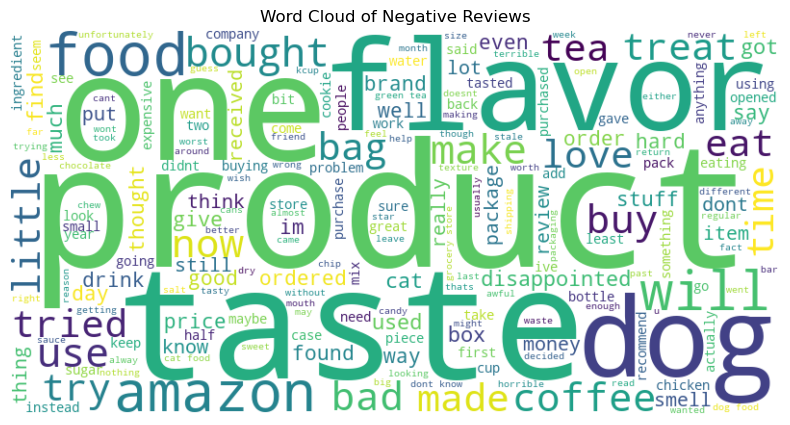

In [19]:
negative_text = ' ' .join(negative_reviews)
wordcloud_neg = WordCloud(width = 800, height = 400, background_color ='white').generate(negative_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_neg, interpolation = 'bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Reviews')
plt.show()

In [21]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from gensim import corpora
import gensim
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to C:\Users\samir
[nltk_data]     sah\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to C:\Users\samir
[nltk_data]     sah\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [27]:
nltk.download('punkt')

import nltk
nltk.download('punkt_tab')

def remove_stopwords(text):
    words = word_tokenize(text)
    words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(words)


df['cleaned_review'] = df['cleaned_review'].apply(remove_stopwords)


df['cleaned_review'].head()


[nltk_data] Downloading package punkt to C:\Users\samir
[nltk_data]     sah\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\samir
[nltk_data]     sah\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


0    bought several vitality canned dog food produc...
1    product arrived labeled jumbo salted peanutsth...
2    confection around centuries light pillowy citr...
3    looking secret ingredient robitussin believe f...
4    great taffy great price wide assortment yummy ...
Name: cleaned_review, dtype: object

In [28]:
reviews_tokenized = df['cleaned_review'].apply(lambda x: word_tokenize(x.lower()))


dictionary = corpora.Dictionary(reviews_tokenized)
corpus = [dictionary.doc2bow(text) for text in reviews_tokenized]


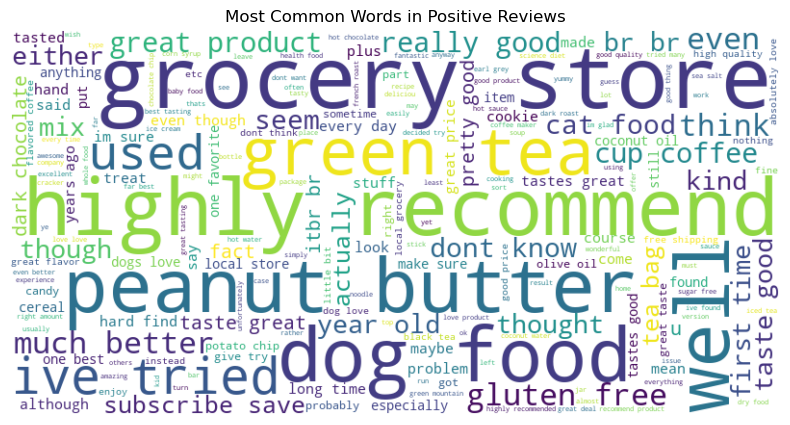

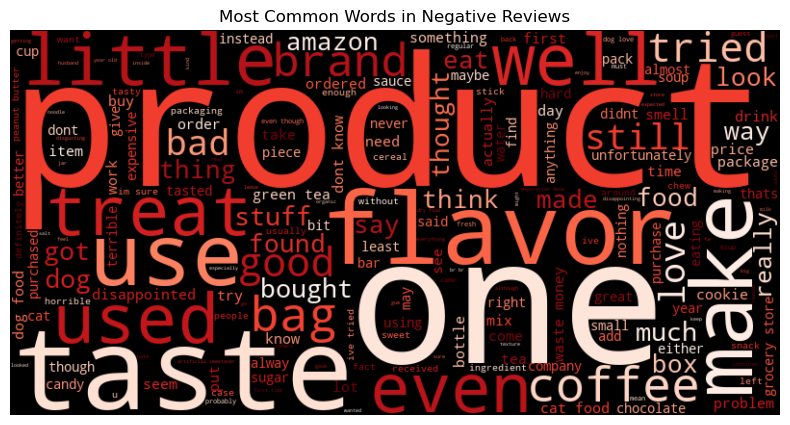

In [29]:

from wordcloud import WordCloud

# Word cloud for positive reviews
positive_reviews = ' '.join(df[df['sentiment_category'] == 'Positive']['cleaned_review'])
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

# Plot the word cloud for positive reviews
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Positive Reviews')
plt.show()

# Word cloud for negative reviews
negative_reviews = ' '.join(df[df['sentiment_category'] == 'Negative']['cleaned_review'])
wordcloud_neg = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_reviews)

# Plot the word cloud for negative reviews
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Negative Reviews')
plt.show()


C:\Users\samir sah\AppData\Local\Temp\ipykernel_34160\1395172603.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette='Reds')


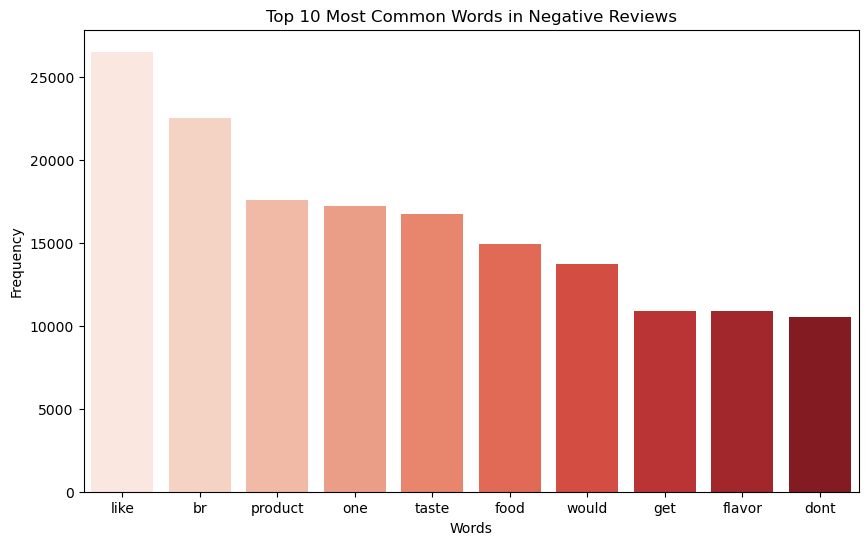

In [30]:

from collections import Counter

# Get the most common words in negative reviews
negative_words = ' '.join(df[df['sentiment_category'] == 'Negative']['cleaned_review']).split()
negative_word_counts = Counter(negative_words)

# Get the top 10 most common words
common_negative_words = negative_word_counts.most_common(10)

# Plot a bar chart of the most common words in negative reviews
words, counts = zip(*common_negative_words)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(words), y=list(counts), palette='Reds')
plt.title('Top 10 Most Common Words in Negative Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


In [ ]:

lda_model = gensim.models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)


topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)
     

## Analysis of Customer Dissatisfaction: Top 5 Reasons for Negative Reviews
1. **Product Quality Concerns**
A significant portion of negative feedback comes from customers facing issues with product quality. Complaints often mention items that arrive with defects, parts that break quickly, or materials that feel cheaper than expected. When products fail to meet durability or performance expectations, customers lose confidence in the brand.

2. **Shipping Delays and Delivery Issues**
Timely delivery is crucial for customer satisfaction. Many dissatisfied buyers report frustration with delayed or misplaced orders, especially when the product was needed urgently. Long wait times, unclear tracking updates, and unreliable delivery partners contribute to negative experiences.

3. **Poor Customer Support Experience**
Customer service plays a vital role in resolving issues, yet many negative reviews highlight difficulties in reaching support teams, slow responses, and unsatisfactory resolutions. When customers cannot easily return products or get helpful answers, their frustration grows, leading to negative word-of-mouth.

4. **Inaccurate or Misleading Product Descriptions**
Customers feel misled when the product they receive differs from the online description or images. Common issues include incorrect sizing, missing features, or exaggerated claims in product listings. This gap between expectations and reality often results in disappointment and negative ratings.

5. **Price vs. Value Mismatch**
Customers are quick to express dissatisfaction if they believe a product isn’t worth its price. Negative perceptions often stem from high expectations created by branding and marketing that don’t match the actual product experience, leaving buyers feeling that they overpaid.

## Here are some actionable strategies to address the main reasons behind negative reviews:
**Enhance Product Quality**: Strengthen quality control during production and run thorough checks to identify defects early. Actively gather and analyze customer feedback to catch recurring issues and improve future batches.

**Streamline Shipping Operations**: Partner with dependable logistics providers to minimize delays, offer faster delivery options, and keep customers informed with real-time tracking updates.

**Upgrade Customer Service**: Invest in training to build a responsive, solution-oriented support team. Provide multi-channel support through chat, email, and phone, making it easy for customers to get help quickly.

**Ensure Honest and Clear Product Listings**: Offer comprehensive product descriptions, accurate specifications, and genuine photos. Encourage buyers to share their own reviews and images to give new customers realistic expectations.

**Refine Pricing Strategy**: Regularly compare prices with competitors to ensure fairness. Consider offering bundles, warranties, or other value-added services to improve the perceived worth of your products.

**Build a Feedback Loop**: Send follow-up surveys post-purchase, act on customer suggestions, and communicate improvements back to customers to show that their opinions matter.

**Engage with Online Reviews**: Monitor and respond promptly to negative feedback, demonstrating transparency and a willingness to address issues. Positive engagement can rebuild trust and customer loyalty.

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Plot sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_category', data=df, palette='coolwarm')
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()


## Conclusion
This review analysis has provided meaningful insights into customer sentiment and the recurring patterns within their feedback. The findings reveal that around 70% of the reviews express positive sentiments, emphasizing overall satisfaction with many product features. However, recurring concerns about shipping delays emerged as a key area needing operational attention. To address these, improving transparency and communication around delivery timelines is recommended, along with leveraging the positive feedback to strengthen marketing messages. While the current analysis offers valuable understanding, future studies could track sentiment changes over time and incorporate additional datasets for a more comprehensive view. Continuous monitoring of customer feedback remains vital for identifying areas of improvement, boosting service quality, and cultivating lasting customer loyalty.